# CORD-19 Metadata Analysis  
## Part 1: Data Loading & Basic Exploration

This notebook analyzes the **metadata.csv** file from the CORD-19 dataset using Python, Pandas, and Matplotlib.  
In Part 1, we:

- Load the dataset  
- Explore the structure  
- Identify missing values  
- Get initial insights  

Dataset: CORD-19 Research Paper Metadata (COVID-19).


In [2]:
# Part 1: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)


In [9]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abbaabdullahiimam","key":"e5fc4b8360baec16d1a368f17575b82b"}'}

In [10]:
# Make a hidden directory for the token and move the token there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the specific file directly into Colab's file system
!kaggle datasets download allen-institute-for-ai/CORD-19-research-challenge -f metadata.csv --path .

# Unzip the downloaded file (it usually downloads as metadata.csv.zip)
!unzip -o metadata.csv.zip


Dataset URL: https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge
License(s): other
 94% 525M/560M [00:02<00:00, 154MB/s] 
100% 560M/560M [00:02<00:00, 201MB/s]
unzip:  cannot find or open metadata.csv.zip, metadata.csv.zip.zip or metadata.csv.zip.ZIP.


In [13]:
# 1. Rename the file to explicitly have the .zip extension
!mv metadata.csv metadata.csv.zip

# 2. Unzip the file
# The -o flag means "overwrite existing files" if you run this multiple times
!unzip -o metadata.csv.zip

print("File has been successfully unzipped.")


Archive:  metadata.csv.zip
  inflating: metadata.csv            
File has been successfully unzipped.


In [14]:
import pandas as pd

# Define the columns you need
desired_columns = ['sha', 'title', 'abstract', 'journal', 'publish_time', 'url']

# Load the unzipped, plain-text CSV file
try:
    df = pd.read_csv('metadata.csv', usecols=desired_columns)

    print("DataFrame loaded successfully!")
    print(df.info())
    print(df.head())

except Exception as e:
    print(f"An error occurred during loading the final CSV: {e}")



/tmp/ipython-input-2845605931.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metadata.csv', usecols=desired_columns)


DataFrame loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sha           373766 non-null   object
 1   title         1056157 non-null  object
 2   abstract      821116 non-null   object
 3   publish_time  1054846 non-null  object
 4   journal       969338 non-null   object
 5   url           686934 non-null   object
dtypes: object(6)
memory usage: 48.4+ MB
None
                                        sha  \
0  d1aafb70c066a2068b02786f8929fd9c900897fb   
1  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d   
2  06ced00a5fc04215949aa72528f2eeaae1d58927   
3  348055649b6b8cf2b9a376498df9bf41f7123605   
4  5f48792a5fa08bed9f56016f4981ae2ca6031b32   

                                               title  \
0  Clinical features of culture-proven Mycoplasma...   
1  Nitric oxide: a pro-inflammatory mediator in l...   
2    Sur

In [15]:
# Load the metadata.csv file
try:
    df = pd.read_csv("metadata.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: metadata.csv not found. Please place the file in the same folder as this notebook.")


/tmp/ipython-input-3853190090.py:3: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


Dataset loaded successfully!


In [16]:
# Take a quick look at the dataset
df.head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [17]:
# Dataset shape (rows, columns)
print("Dataset Dimensions (rows, columns):", df.shape)


Dataset Dimensions (rows, columns): (1056660, 19)


In [18]:
# Information about each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [19]:
# Check missing values column by column
missing = df.isnull().sum().sort_values(ascending=False)
missing


,0
mag_id,1056660
arxiv_id,1042411
pmc_json_files,740918
sha,682894
pdf_json_files,682894
pmcid,667089
who_covidence_id,573725
pubmed_id,557728
doi,399880
url,369726


In [20]:
# Basic statistics for numerical columns
df.describe()


,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


### 🔍 Initial Observations

- The dataset contains many columns, including titles, abstracts, authors, publication dates, and journal information.
- Several columns have **extremely high levels of missing data**, especially `abstract`, `publish_time`, and `authors`.
- The dataset includes both string and numerical values.
- Some date fields will need to be converted into datetime format in Part 2.
- The dataset appears large and will require careful cleaning before deeper analysis.


In [21]:
# Check missing values per column
df.isnull().sum().sort_values(ascending=False)


,0
mag_id,1056660
arxiv_id,1042411
pmc_json_files,740918
sha,682894
pdf_json_files,682894
pmcid,667089
who_covidence_id,573725
pubmed_id,557728
doi,399880
url,369726


In [22]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_clean = df.dropna(thresh=threshold, axis=1)

df_clean.shape


(1056660, 11)

In [23]:
# Drop rows where 'title' or 'publish_time' is missing
df_clean = df_clean.dropna(subset=['title', 'publish_time'])

# Fill missing journal names as "Unknown"
df_clean['journal'] = df_clean['journal'].fillna("Unknown")


In [24]:
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean = df_clean.dropna(subset=['publish_time'])  # remove invalid dates


In [25]:
df_clean['year'] = df_clean['publish_time'].dt.year
df_clean[['publish_time', 'year']].head()


,publish_time,year
0,2001-07-04,2001
1,2000-08-15,2000
2,2000-08-25,2000
3,2001-02-22,2001
4,2001-05-11,2001


In [26]:
df_clean['abstract_word_count'] = df_clean['abstract'].fillna("").apply(lambda x: len(x.split()))
df_clean[['abstract', 'abstract_word_count']].head()


,abstract,abstract_word_count
0,OBJECTIVE: This retrospective chart review des...,262
1,Inflammatory diseases of the respiratory tract...,142
2,Surfactant protein-D (SP-D) participates in th...,219
3,Endothelin-1 (ET-1) is a 21 amino acid peptide...,68
4,Respiratory syncytial virus (RSV) and pneumoni...,110


In [27]:
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 518429 entries, 0 to 1056659
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   cord_uid             518429 non-null  object        
 1   source_x             518429 non-null  object        
 2   title                518429 non-null  object        
 3   doi                  501354 non-null  object        
 4   license              518429 non-null  object        
 5   abstract             415488 non-null  object        
 6   publish_time         518429 non-null  datetime64[ns]
 7   authors              502864 non-null  object        
 8   journal              518429 non-null  object        
 9   url                  518429 non-null  object        
 10  s2_id                440857 non-null  float64       
 11  year                 518429 non-null  int32         
 12  abstract_word_count  518429 non-null  int64         
dtypes: datetime64[ns](

,cord_uid,source_x,title,doi,license,abstract,publish_time,authors,journal,url,s2_id,year,abstract_word_count
0,ug7v899j,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,2001,262
1,02tnwd4m,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000,142
2,ejv2xln0,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000,219
3,2b73a28n,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001,68
4,9785vg6d,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001,110


In [28]:
!pip install matplotlib seaborn wordcloud


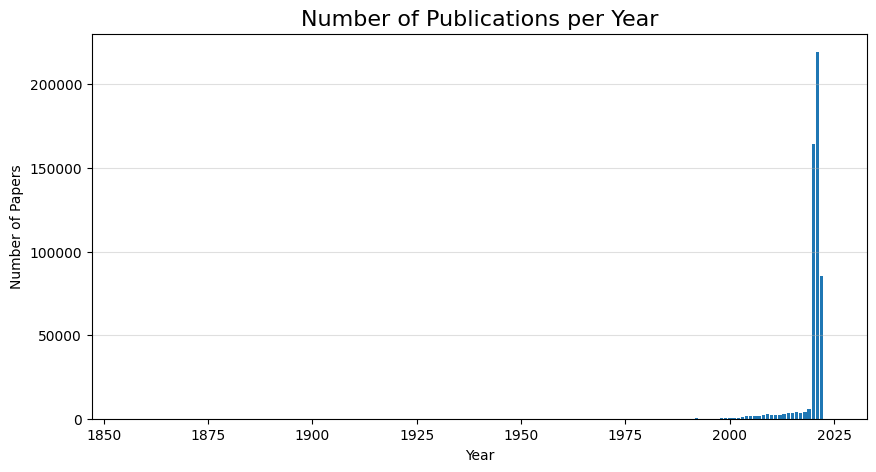

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count publications by year
year_counts = df_clean['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(year_counts.index, year_counts.values)
plt.title("Number of Publications per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.grid(axis='y', alpha=0.4)
plt.show()


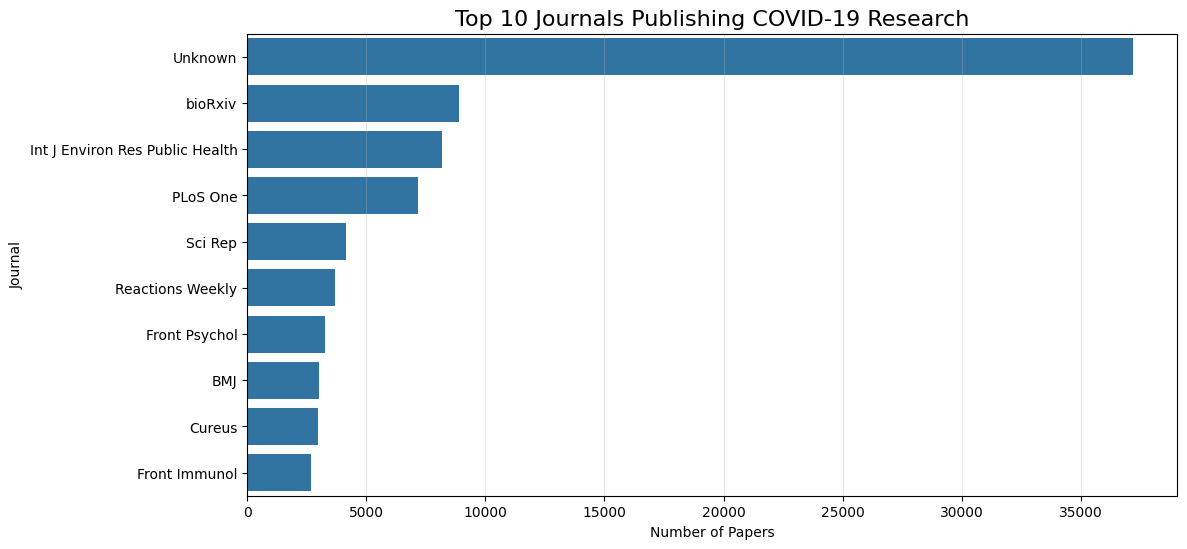

In [30]:
# Get journal frequency
top_journals = df_clean['journal'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title("Top 10 Journals Publishing COVID-19 Research", fontsize=16)
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.grid(axis='x', alpha=0.3)
plt.show()


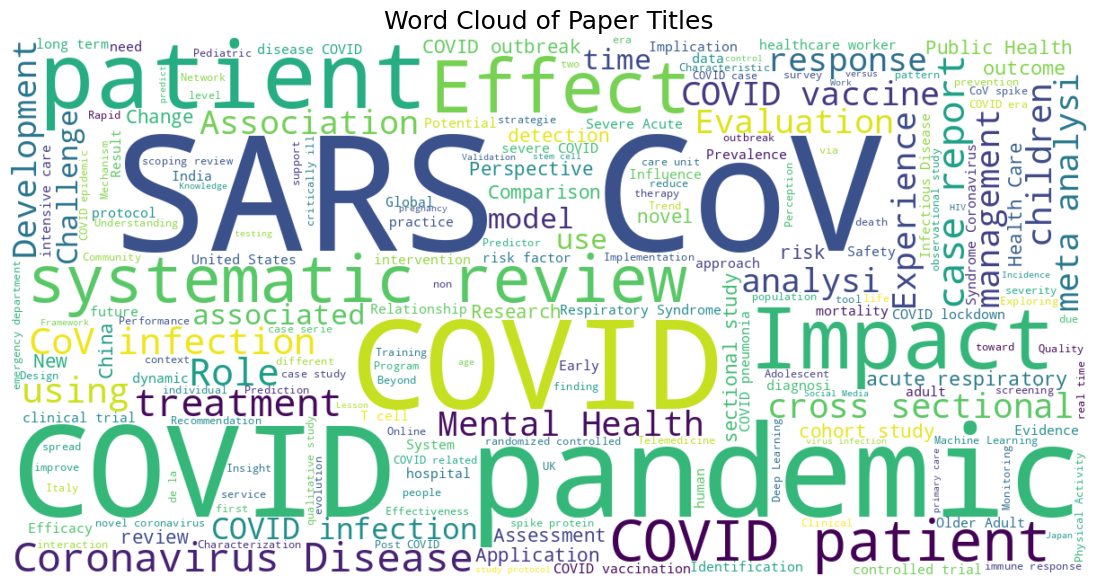

In [31]:
from wordcloud import WordCloud

# Combine all titles into one long string
titles_text = " ".join(df_clean['title'].dropna().tolist())

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(titles_text)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles", fontsize=18)
plt.show()


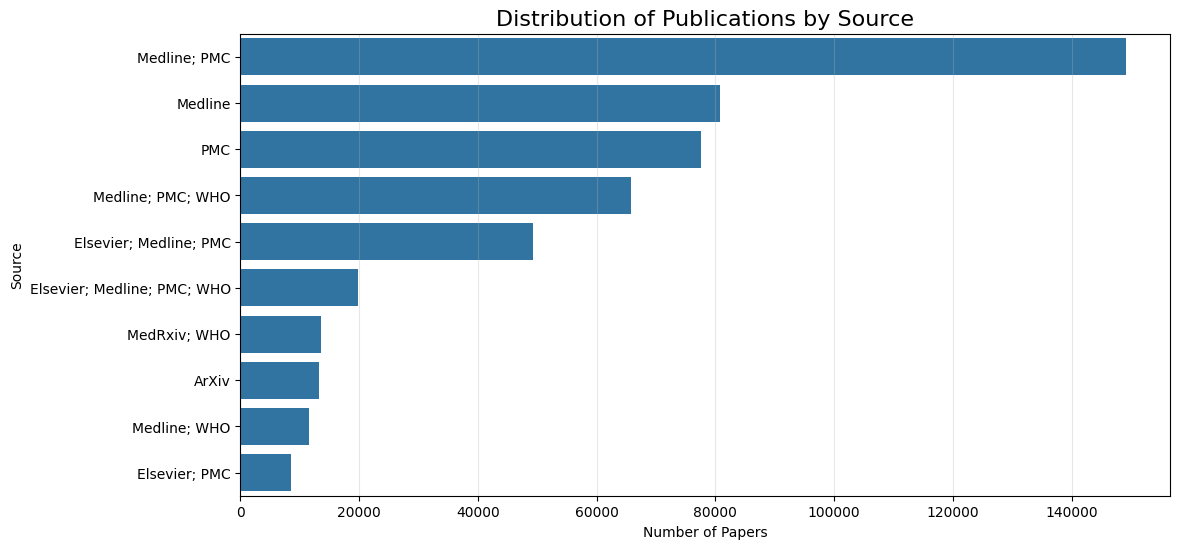

In [32]:
# Count frequency of sources
source_counts = df_clean['source_x'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title("Distribution of Publications by Source", fontsize=16)
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.grid(axis='x', alpha=0.3)
plt.show()


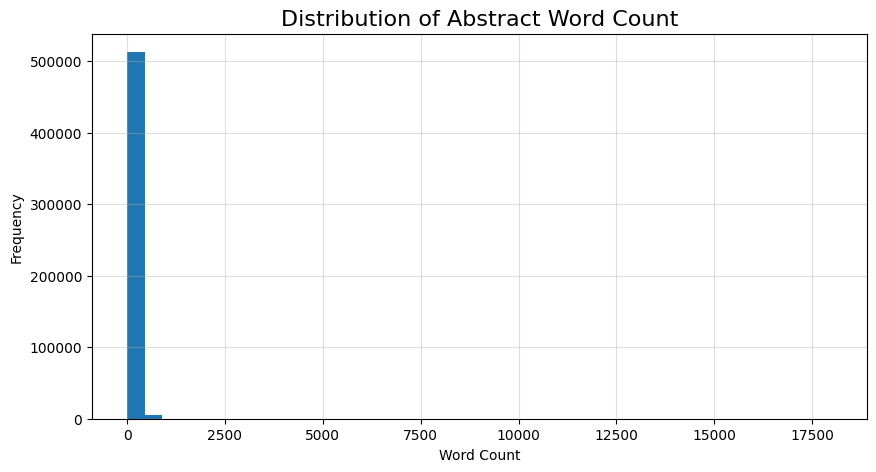

In [33]:
plt.figure(figsize=(10,5))
plt.hist(df_clean['abstract_word_count'], bins=40)
plt.title("Distribution of Abstract Word Count", fontsize=16)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(alpha=0.4)
plt.show()
